In [44]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Read the dataset
file_path = 'data/Hourly-test.csv'
data = pd.read_csv(file_path)

In [45]:
data.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31',
       'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'V41',
       'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49'],
      dtype='object')

In [46]:
data

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49
0,H1,619.0,565.0,532.0,495.0,481.0,467.0,473.0,488.0,501.0,...,812.0,836.0,838.0,829.0,807.0,785.0,756.0,719.0,703.0,659.0
1,H2,2771.0,2396.0,2189.0,1984.0,1872.0,1843.0,1828.0,1872.0,1952.0,...,3018.0,3206.0,3356.0,3499.0,3550.0,3558.0,3488.0,3224.0,3054.0,2918.0
2,H3,1455.0,1376.0,1235.0,1101.0,1003.0,943.0,905.0,886.0,910.0,...,1457.0,1529.0,1627.0,1701.0,1754.0,1791.0,1819.0,1791.0,1758.0,1679.0
3,H4,5327.0,5051.0,4683.0,4319.0,4049.0,3847.0,3712.0,3639.0,3652.0,...,5337.0,5675.0,5926.0,6159.0,6313.0,6072.0,5612.0,5220.0,4895.0,4793.0
4,H5,3823.0,3501.0,3039.0,2613.0,2312.0,2079.0,1938.0,1839.0,1821.0,...,2345.0,2529.0,2737.0,3028.0,3292.0,3453.0,3574.0,3522.0,3338.0,3041.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409,H410,48.0,43.0,37.0,31.0,32.0,40.0,116.0,164.0,135.0,...,163.0,187.0,180.0,175.0,171.0,170.0,131.0,124.0,167.0,126.0
410,H411,38.0,20.0,21.0,21.0,33.0,70.0,162.0,263.0,217.0,...,145.0,170.0,156.0,122.0,116.0,86.0,77.0,63.0,62.0,74.0
411,H412,27.0,19.0,14.0,17.0,15.0,23.0,47.0,92.0,94.0,...,80.0,87.0,106.0,79.0,81.0,78.0,54.0,53.0,72.0,40.0
412,H413,34.0,26.0,19.0,14.0,14.0,17.0,24.0,23.0,19.0,...,92.0,103.0,108.0,101.0,86.0,99.0,88.0,47.0,41.0,34.0


In [115]:
data['V1']

0        H1
1        H2
2        H3
3        H4
4        H5
       ... 
409    H410
410    H411
411    H412
412    H413
413    H414
Name: V1, Length: 414, dtype: object

In [106]:
time_series = data.groupby('V1')['V2'].sum().reset_index()

In [107]:
time_series.set_index('V1', inplace=True)

In [112]:
hw_model = ExponentialSmoothing(
    time_series,
    trend='add',
    seasonal='add',
    seasonal_periods=24
).fit()


c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [113]:
forecast_steps = 12
hw_forecast = hw_model.forecast(steps=forecast_steps)

c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


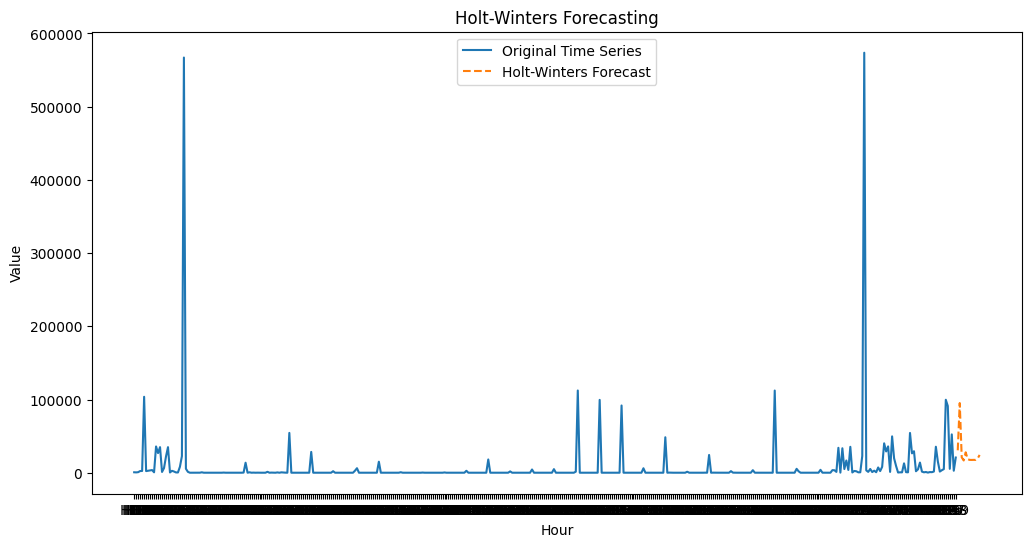

In [114]:
plt.figure(figsize=(12, 6))
plt.plot(time_series.index, time_series, label='Original Time Series')
plt.plot(hw_forecast.index, hw_forecast, label='Holt-Winters Forecast', linestyle='--')
plt.title('Holt-Winters Forecasting')
plt.xlabel('Hour')
plt.ylabel('Value')
plt.legend()
plt.show()

In [111]:
hw_forecast

414    27474.805604
415    75267.512482
416    18717.276914
417    16690.353931
418    20633.877896
419    14207.202917
420    27433.351524
421    25108.386827
422    11866.437142
423    20621.671500
424    12011.992718
425    18580.839267
dtype: float64